# Getting Starting

## Importing and Sampling

In [1]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.formula import api
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import collections as co
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [2]:
# Custom Pipeline
from Pipeline import FHVProcessPipeline

In [38]:
# initialize the pipeline
processPipeline = FHVProcessPipeline('./fhvhv_tripdata_2022-11.parquet', samples=20000)

In [39]:
# getting data (training data), validation data, test data and the original data with irrelevant columns dropped
data, validate_data, test_data, orig_data = processPipeline.process_data()

In [111]:
data.head()

,trip_miles,is_airport_trip,congestion_lvl,trip_time_real,hourly_segments_H1,hourly_segments_H2,hourly_segments_H3,hourly_segments_H4,hourly_segments_H5,hourly_segments_H6,day_segments_WD,day_segments_WK,total_fare,enc_day_x_time,enc_PUxDOL
7018837,1.600,0,2,19.767,0,0,0,0,0,1,0,1,32.75,6.421295,25.230423
5738831,5.700,0,0,19.200,0,0,0,0,1,0,1,0,22.29,7.991382,26.227372
16241159,1.670,0,0,8.633,0,0,0,0,0,1,0,1,7.99,6.456389,18.675281
9695098,5.128,0,2,17.717,0,0,1,0,0,0,1,0,32.95,6.392590,26.816053
3075065,1.130,0,0,5.750,0,0,1,0,0,0,0,1,7.91,6.977741,24.105023


In [115]:
orig_data.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,congestion_surcharge,airport_fee
9695098,2022-11-16 21:59:54,2022-11-16 22:17:37,148,25,5.128,1063,30.20,2.75,0.0
4934893,2022-11-09 11:28:32,2022-11-09 11:40:05,230,164,1.290,693,13.62,2.75,0.0
16281090,2022-11-27 18:40:06,2022-11-27 18:45:43,114,113,0.710,337,6.47,2.75,0.0
13033019,2022-11-21 19:22:12,2022-11-21 19:39:24,216,130,3.200,1032,16.42,0.00,0.0
17064968,2022-11-29 09:49:56,2022-11-29 09:56:02,26,22,0.949,366,6.25,0.00,0.0


## Exploring, Cleaning and Transforming Indivual Features

### Airport Fee

Showing counts of Airport Fees

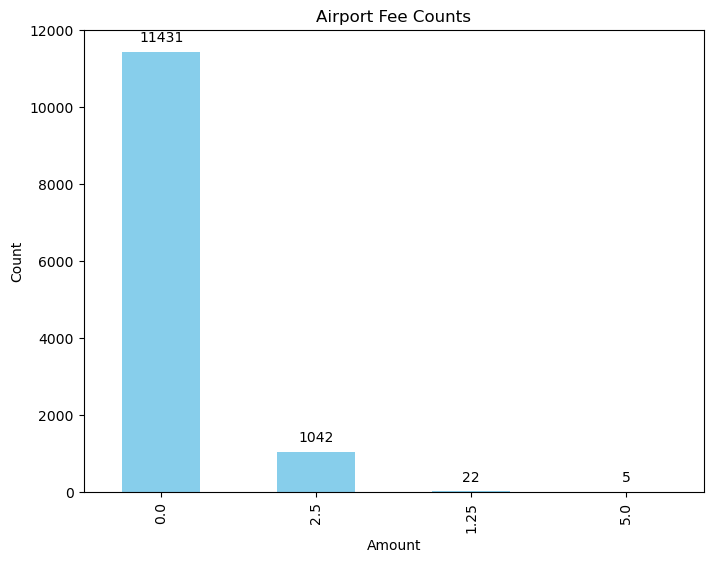

In [9]:
fee_counts = orig_data['airport_fee'].value_counts()

# Create the bar plot
ax = fee_counts.plot(kind='bar', title="Airport Fee Counts", ylabel="Count", xlabel="Amount", color='skyblue', figsize=(8, 6))
# Add anotation
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Congestion Surcharge

Showing counts of congestion surcharge

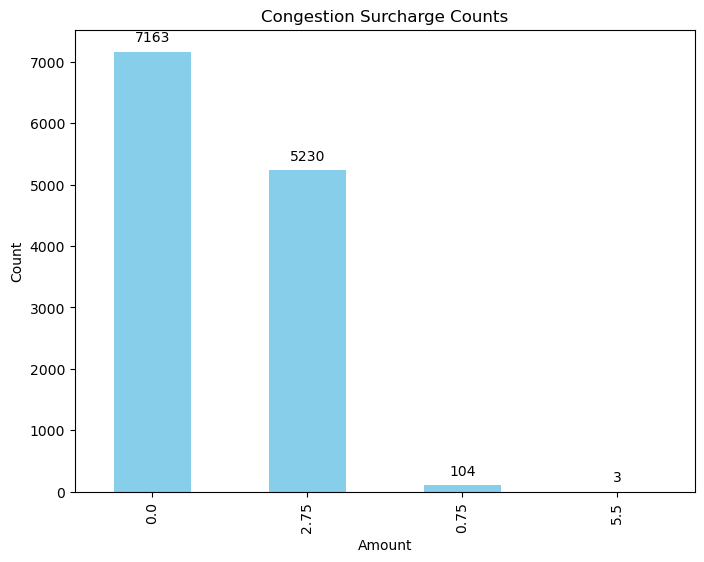

In [10]:
surcharge_counts = orig_data['congestion_surcharge'].value_counts()

# Create the bar plot
ax = surcharge_counts.plot(kind='bar', title="Congestion Surcharge Counts", ylabel="Count", xlabel="Amount", color='skyblue', figsize=(8, 6))

# Add Annotation
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Base Passenger Fare

Examining base fare greater than 400 and less than 5, justify what's considered as outliers

In [11]:
orig_data[orig_data['base_passenger_fare'] > 400]

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,congestion_surcharge,airport_fee
10281341,2022-11-17 20:26:58,2022-11-17 22:05:54,186,265,67.49,5936,411.55,0.0,0.0


In [12]:
orig_data[orig_data['base_passenger_fare'] < 5].head(10)

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,congestion_surcharge,airport_fee
16079911,2022-11-27 11:45:01,2022-11-27 12:04:03,119,129,8.79,1143,-10.38,0.0,0.0
6764481,2022-11-12 07:03:23,2022-11-12 07:28:06,124,28,7.58,1483,-3.47,0.0,0.0
12960007,2022-11-21 17:32:53,2022-11-21 17:34:54,76,77,0.30,121,-0.86,0.0,0.0
7644959,2022-11-13 12:29:36,2022-11-13 12:44:02,160,138,6.44,866,-2.50,0.0,2.5
1507892,2022-11-03 18:04:19,2022-11-03 18:50:35,16,35,12.78,2776,-4.87,0.0,0.0
17575630,2022-11-30 08:49:18,2022-11-30 08:56:11,248,250,1.74,413,1.10,0.0,0.0
10624379,2022-11-18 10:11:04,2022-11-18 10:18:27,91,39,1.65,443,-0.96,0.0,0.0
1180246,2022-11-03 07:41:18,2022-11-03 07:49:35,122,130,1.71,497,-1.91,0.0,0.0
2463036,2022-11-05 03:18:19,2022-11-05 03:35:33,181,89,3.07,1034,-1.90,0.0,0.0
559274,2022-11-02 01:41:39,2022-11-02 01:47:27,173,56,1.02,348,-0.94,0.0,0.0


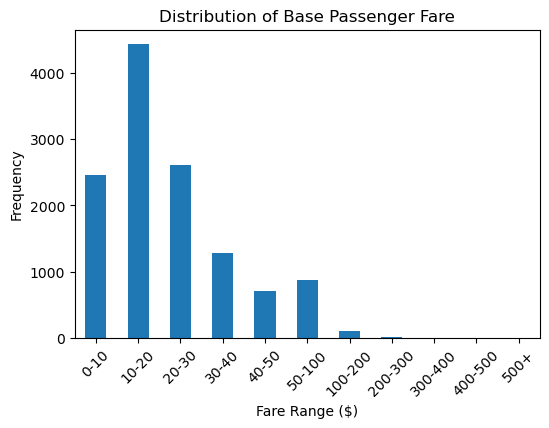

In [13]:
# Binning the base fare the visualize the distribution
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500+']

orig_data['fare_range'] = pd.cut(orig_data['base_passenger_fare'], bins=bins, labels=labels)

fare_distribution = orig_data['fare_range'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
fare_distribution.plot(kind='bar')
plt.title('Distribution of Base Passenger Fare')
plt.xlabel('Fare Range ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

orig_data.drop(columns=['fare_range'], inplace=True)

## EDA

Exploring the relationship of the features vs the target

<Axes: xlabel='trip_miles', ylabel='base_passenger_fare'>

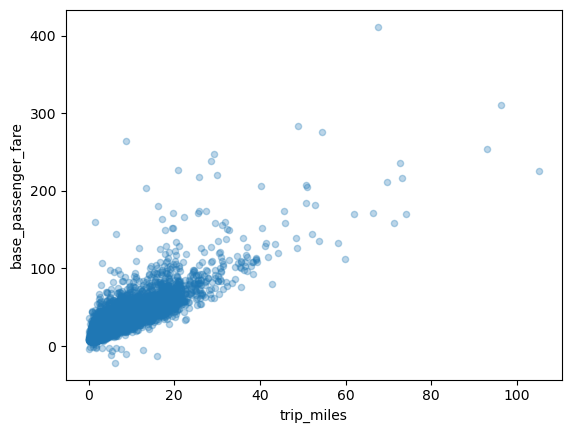

In [14]:
orig_data.plot.scatter(x='trip_miles', y='base_passenger_fare', alpha=0.3)

<Axes: xlabel='trip_miles', ylabel='total_fare'>

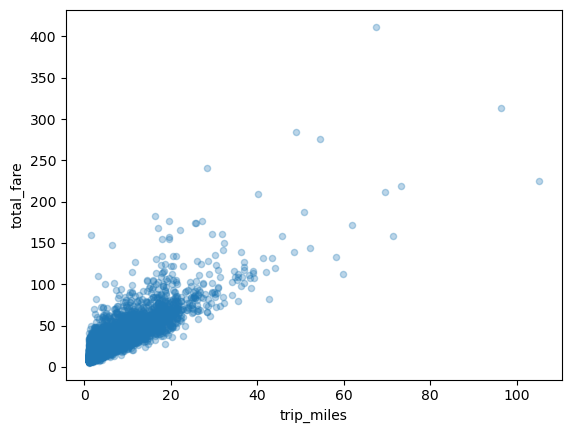

In [15]:
data.plot.scatter(x='trip_miles', y='total_fare', alpha=0.3)

<Axes: xlabel='trip_time', ylabel='base_passenger_fare'>

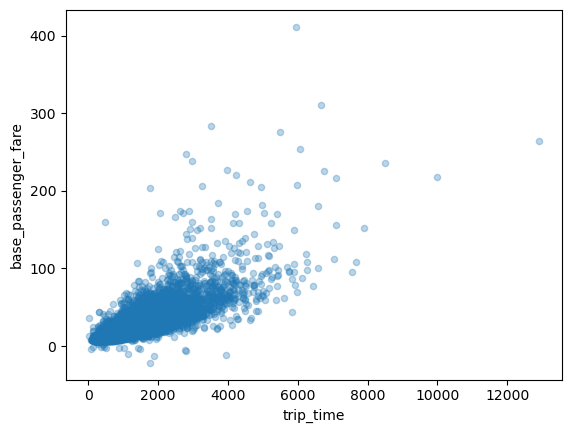

In [16]:
orig_data.plot.scatter(x='trip_time', y='base_passenger_fare', alpha=0.3)

<Axes: xlabel='trip_time_real', ylabel='total_fare'>

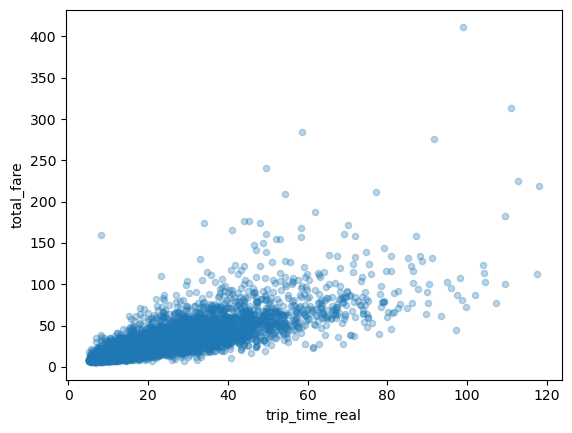

In [17]:
data.plot.scatter(x='trip_time_real', y='total_fare', alpha=0.3)

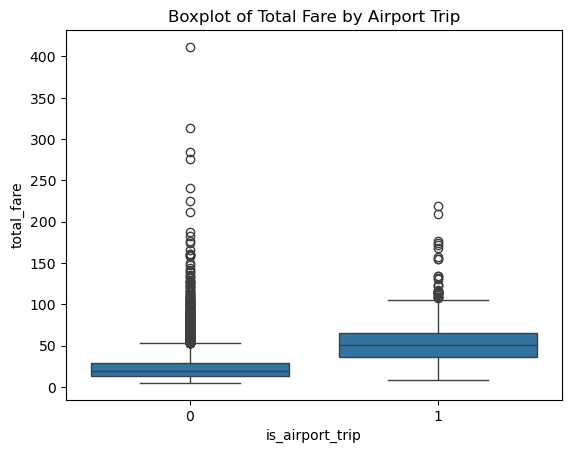

In [18]:
sns.boxplot(x='is_airport_trip', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Airport Trip')
plt.show()

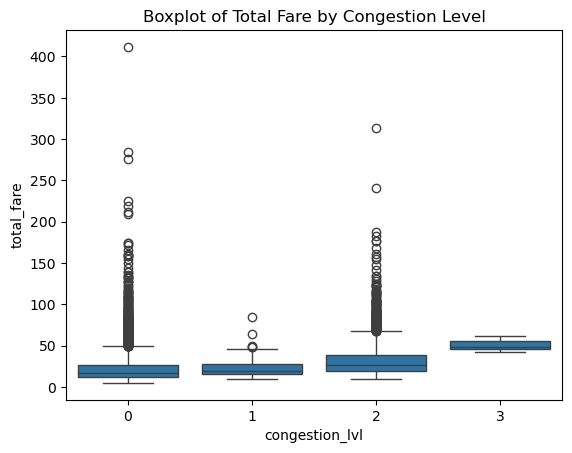

In [19]:
sns.boxplot(x='congestion_lvl', y='total_fare', data=data)
plt.title('Boxplot of Total Fare by Congestion Level')
plt.show()

<Axes: >

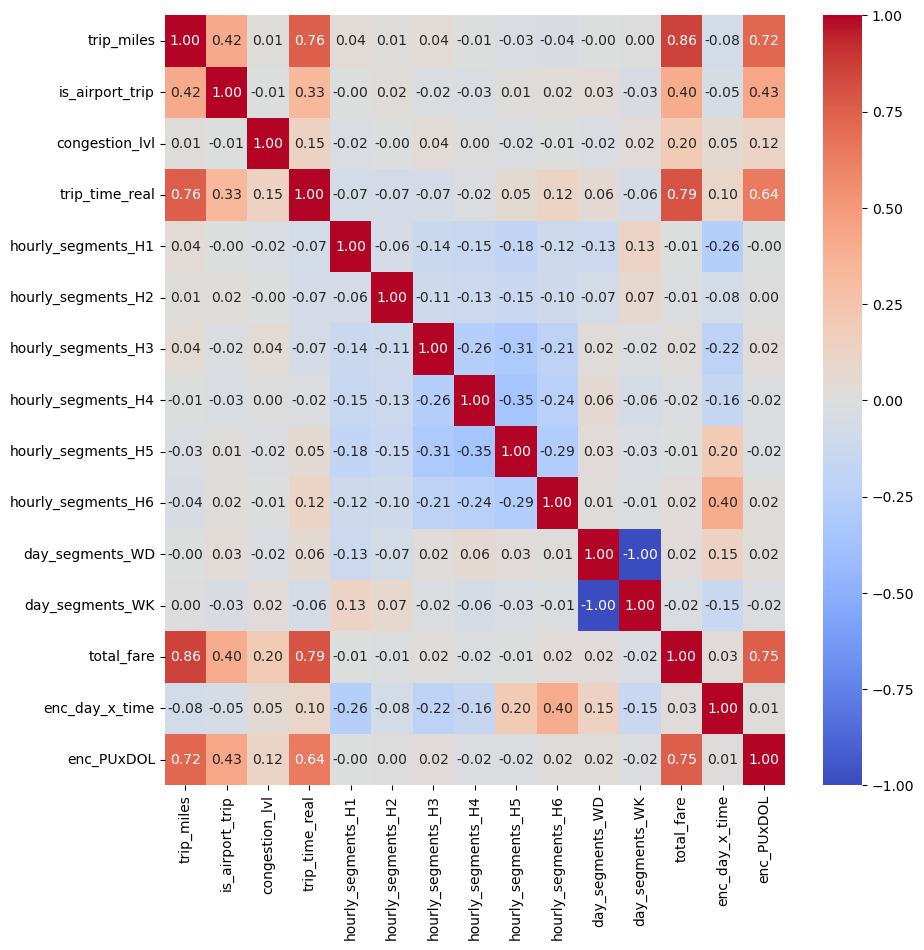

In [22]:
## generating correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

## Spliting and Scaling Data

In [42]:
X_train = data.drop('total_fare', axis=1)  
y_train = data['total_fare']

X_val = validate_data.drop('total_fare', axis=1)  
y_val = validate_data['total_fare']


X_test = test_data.drop('total_fare', axis=1)  
y_test = test_data['total_fare']

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [44]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_test.columns)

### Summary

P values indicate that the all features can be used as predictors. About 82% of the variability can be explained by this model.

In [26]:
a = data.columns.values

API = api.ols(formula='{} ~ {}'.format('total_fare',' + '.join(i for i in X_train.columns)), data=data).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_fare   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3332.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:                -30140.
No. Observations:                8397   AIC:                         6.031e+04
Df Residuals:                    8384   BIC:                         6.040e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -18.2753      0.769    -23.751      0.000     -19.784     -16.767
trip_miles             1.8634      0.030     61.319      0.000       1.804       1.923
is_airport_trip        1.1635      0.371      3.135      0.002       0.436       1.891
congestion_lvl         2.8085      0.101     27.866      0.000       2.611       3.006
trip_time_real         0.3787      0.012     32.131      0.000       0.356       0.402
hourly_segments_H1    -2.5506      0.328     -7.767      0.000      -3.194      -1.907
hourly_segments_H2    -2.7715      0.393     -7.045      0.000      -3.543      -2.000
hourly_segments_H3    -2.4940      0.239    -10.423      0.000      -2.963      -2.025
hourly_segments_H4    -3.3154      0.227    -14.613      0.000      -3.760      -2.871
hourly_segments_H5    -3.5007      0.248    -14.140      0.000      -3.986      -3.015
hourly_segments_H6    -3.6431      0.326    -11.173      0.000      -4.282      -3.004
day_segments_WD       -9.0878      0.408    -22.278      0.000      -9.887      -8.288
day_segments_WK       -9.1875      0.391    -23.519      0.000      -9.953      -8.422
enc_day_x_time         1.3199      0.156      8.451      0.000       1.014       1.626
enc_PUxDOL             1.0350      0.037     28.270      0.000       0.963       1.107
==============================================================================
Omnibus:                    10036.719   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3738653.005
Skew:                           5.923   Prob(JB):                         0.00
Kurtosis:                     105.691   Cond. No.                     4.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# PCA

The dataset contains 14 features and the PCA graph suggests that we need at least 9 componets to make a good prediction. However, experiments showed that with less components the error will tend to increase. Therefore, we are not considering using PCA to reduce the dimension.

In [116]:
X_train_scaled.shape

(16773, 14)

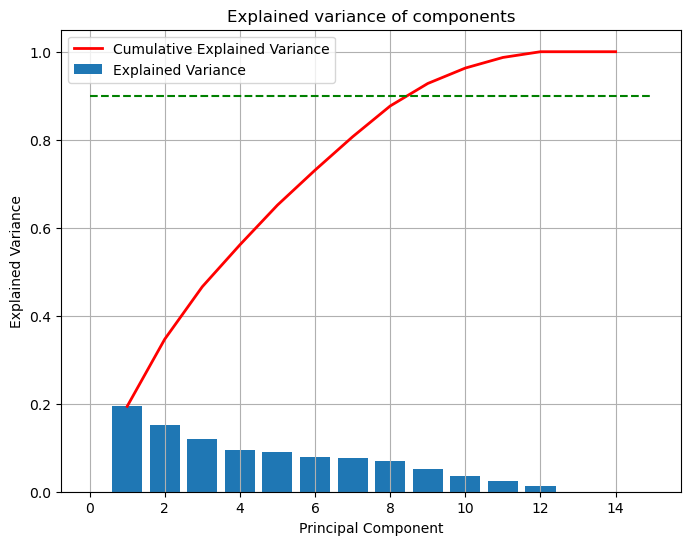

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Model Training

## Training

### Baseline Models

In [45]:
# making an array of dataset with different features, mainly with or without the encoded features.
datasets = {
    'With_Encoding': (X_train_scaled, X_val_scaled),
    'Without_Encoded_Date_Time': (X_train_scaled.drop(columns=['enc_day_x_time']), X_val_scaled.drop(columns=['enc_day_x_time'])),
    'Without_Encoded_Location': (X_train_scaled.drop(columns=['enc_PUxDOL']), X_val_scaled.drop(columns=['enc_PUxDOL'])),
    'Without_Encoding': (X_train_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']), X_val_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']))
}

In [46]:
linear_reg = LinearRegression()
poly_reg = LinearRegression()

In [47]:
# Cheking Error of 2, 3, and 4 degrees with dataset that includes encoded features
degree_res = []

for n in range(2, 5):
    poly_features = PolynomialFeatures(degree=n, include_bias=False)
    X_poly = poly_features.fit_transform(X_train_scaled)
    scores = cross_val_score(poly_reg, X_poly, y_train, cv=3, scoring='neg_mean_squared_error')
    degree_res.append(-scores.mean())

degree_res

[55.596956258167644, 68.49016039277582, 3645844246931548.0]

In [59]:
# Cheking Error of 2, 3, and 4 degrees with dataset that excludes encoded features
degree_res = []

for n in range(2, 5):
    poly_features = PolynomialFeatures(degree=n, include_bias=False)
    X_poly = poly_features.fit_transform(X_train_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']))
    scores = cross_val_score(poly_reg, X_poly, y_train, cv=3, scoring='neg_mean_squared_error')
    degree_res.append(-scores.mean())


degree_res

[69.7306410526892, 80.10497379604051, 1008693765148216.1]

In [49]:
# init results to store errors
results = co.defaultdict(dict)

In [50]:
## evaluating models with various datasets using single validation
for conf, (train, val) in datasets.items():
        
    linear_reg.fit(train, y_train)
    y_pred = linear_reg.predict(val)
    mse = mean_squared_error(y_val, y_pred)
    r2  = metrics.r2_score(y_val, y_pred)
    mae  = metrics.mean_absolute_error(y_val, y_pred)
        
    results[conf + '_Linear']['R^2'] = r2
    results[conf + '_Linear']['MSE'] = mse
    results[conf + '_Linear']['MAE'] = mae
    
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly_features.fit_transform(train)
    X_poly_val = poly_features.transform(val)
    
    poly_reg.fit(X_poly, y_train)
    y_pred = poly_reg.predict(X_poly_val)
    mse = mean_squared_error(y_val, y_pred)
    r2  = metrics.r2_score(y_val, y_pred)
    mae  = metrics.mean_absolute_error(y_val, y_pred)
        
    results[conf + '_Poly']['R^2'] = r2
    results[conf + '_Poly']['MSE'] = mse
    results[conf + '_Poly']['MAE'] = mae
    

In [51]:
## evaluating models with various datasets using cross validation
for conf, (train, val) in datasets.items():
    
    scores = cross_val_score(linear_reg, train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[conf + '_Linear']['MSE_CV'] = -scores.mean()
        
    
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly_features.fit_transform(train)
    scores = cross_val_score(poly_reg, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    results[conf + '_Poly']['MSE_CV'] = -scores.mean()

In [52]:
df = pd.DataFrame(results).T
df['1-R^2'] = 1-df['R^2']
df

,R^2,MSE,MAE,MSE_CV,1-R^2
With_Encoding_Linear,0.794885,88.032151,4.601213,66.030708,0.205115
With_Encoding_Poly,0.714839,122.386827,5.506930,62.504570,0.285161
Without_Encoded_Date_Time_Linear,0.793206,88.752726,4.569368,66.897965,0.206794
Without_Encoded_Date_Time_Poly,0.700154,128.689282,5.579397,60.139880,0.299846
Without_Encoded_Location_Linear,0.794106,88.366593,4.672838,69.228046,0.205894
Without_Encoded_Location_Poly,0.812296,80.559795,4.554099,73.749288,0.187704
Without_Encoding_Linear,0.792289,89.146471,4.636418,70.319246,0.207711
Without_Encoding_Poly,0.813839,79.897460,4.555449,74.498702,0.186161


### More Models

In [66]:
ridge = Ridge(alpha=3, solver='sag', fit_intercept=True)
knn = KNeighborsRegressor(n_neighbors=5)

In [67]:
more_models = {
    'Ridge' : ridge,
    'KNN': knn
}

In [68]:
## evaluating models with various datasets using single and cross validation
for conf, (train, val) in datasets.items():
    for name, m in more_models.items():
        m.fit(train, y_train)
        y_pred = m.predict(val)
        mse = mean_squared_error(y_val, y_pred)
        r2  = metrics.r2_score(y_val, y_pred)
        mae  = metrics.mean_absolute_error(y_val, y_pred)
        scores = cross_val_score(m, train, y_train, cv=5, scoring='neg_mean_squared_error')
        results[conf + "_" + name]['MSE_CV'] = -scores.mean()
        results[conf + "_" + name]['R^2'] = r2
        results[conf + "_" + name]['MSE'] = mse
        results[conf + "_" + name]['MAE'] = mae

In [73]:
# visualizing the result
df = pd.DataFrame(results).T
df['1-R^2'] = 1-df['R^2']
df = df.sort_index()
df

,R^2,MSE,MAE,MSE_CV,1-R^2
With_Encoding_KNN,0.777257,95.597957,4.981096,67.921930,0.222743
With_Encoding_Linear,0.794885,88.032151,4.601213,66.030708,0.205115
With_Encoding_Poly,0.714839,122.386827,5.506930,62.504570,0.285161
With_Encoding_Ridge,0.794855,88.044958,4.585176,66.046759,0.205145
Without_Encoded_Date_Time_KNN,0.767012,99.994650,5.227564,65.124297,0.232988
Without_Encoded_Date_Time_Linear,0.793206,88.752726,4.569368,66.897965,0.206794
Without_Encoded_Date_Time_Poly,0.700154,128.689282,5.579397,60.139880,0.299846
Without_Encoded_Date_Time_Ridge,0.793190,88.759435,4.569242,66.912731,0.206810
Without_Encoded_Location_KNN,0.757980,103.871241,5.122220,83.093632,0.242020
Without_Encoded_Location_Linear,0.794106,88.366593,4.672838,69.228046,0.205894


### Hyperparameter Tuning

#### Ridge

In [58]:
ridge = Ridge()

param_distribs = {'alpha': randint(low=1, high=10),
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'fit_intercept': [True] }

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_scaled)

rnd_search = RandomizedSearchCV(
    ridge, param_distributions=param_distribs, n_iter=100, cv=3,
    scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_poly, y_train)

print("Best parameters:", rnd_search.best_params_)

# Best score achieved
print("Best score:", rnd_search.best_score_)


/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/daysondong/miniconda3/envs/SEA600/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Best parameters: {'alpha': 9, 'fit_intercept': True, 'solver': 'lsqr'}
Best score: -55.55625956334685


In [60]:
ridge = Ridge()

param_distribs = {'alpha': randint(low=1, high=10),
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'fit_intercept': [True] }

rnd_search = RandomizedSearchCV(
    ridge, param_distributions=param_distribs, n_iter=100, cv=3,
    scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_scaled, y_train)

print("Best parameters:", rnd_search.best_params_)

# Best score achieved
print("Best score:", rnd_search.best_score_)

Best parameters: {'alpha': 3, 'fit_intercept': True, 'solver': 'sag'}
Best score: -66.02571857571097


#### KNN

In [61]:
knn = KNeighborsRegressor()

param_distribs = {
    'n_neighbors': randint(low=1, high=20),
}

rnd_search = RandomizedSearchCV(
    knn, param_distributions=param_distribs, n_iter=100, cv=3,
    scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_scaled, y_train)

print("Best parameters:", rnd_search.best_params_)

print("Best score:", rnd_search.best_score_)

Best parameters: {'n_neighbors': 5}
Best score: -67.1561056886663


## Recource Utilization Evaluation


### Time Evaluation

#### Overall Time

In [97]:
%%timeit -r1
lr = LinearRegression()
fit = lr.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

27.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [98]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_scaled)

In [99]:
X_poly_val = poly_features.transform(X_val_scaled)

In [100]:
%%timeit -r1
poly = LinearRegression()
fit = poly.fit(X_poly, y_train)
preds = fit.predict(X_poly_val)
metrics.mean_squared_error(y_val, preds)

207 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [101]:
%%timeit -r1
ridge = Ridge(alpha=8, solver='sag', fit_intercept=True)
fit = ridge.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

40.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [102]:
%%timeit -r1
knn = KNeighborsRegressor(n_neighbors=12)
fit = knn.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

153 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Fitting Time

In [80]:
%timeit -r1 lr_fit = linear_reg.fit(X_train_scaled, y_train)

%timeit -r1 poly_fit = poly_reg.fit(X_poly, y_train)

%timeit -r1 ridge_fit = ridge.fit(X_train_scaled, y_train)

%timeit -r1 knn_fit = knn.fit(X_train_scaled, y_train)


5.98 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
73.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
24.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
5.28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


#### Time Prediction

In [81]:
lr_fit = linear_reg.fit(X_train_scaled, y_train)
%timeit -r1 preds = lr_fit.predict(X_val_scaled)

poly_fit = poly_reg.fit(X_train_scaled, y_train)
%timeit -r1 preds = poly_reg.predict(X_val_scaled)

ridge_fit = ridge.fit(X_train_scaled, y_train)
%timeit -r1 preds = ridge_fit.predict(X_val_scaled)

knn_fit = knn.fit(X_train_scaled, y_train)
%timeit -r1 preds = knn_fit.predict(X_val_scaled)


3.72 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
824 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
95.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


### Memory Usage

#### Overall Usage

In [82]:
%load_ext memory_profiler

In [83]:
%%memit -r1
lr = LinearRegression()
fit = lr.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

peak memory: 259.47 MiB, increment: 4.66 MiB


In [84]:
%%memit -r1
poly = LinearRegression()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_scaled)
fit = poly.fit(X_poly, y_train)
preds = fit.predict(X_poly_val)
metrics.mean_squared_error(y_val, preds)

peak memory: 296.00 MiB, increment: 36.50 MiB


In [85]:
%%memit -r1
ridge = Ridge(alpha=8, solver='sag', fit_intercept=True)
fit = ridge.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

peak memory: 281.42 MiB, increment: 1.92 MiB


In [86]:
%%memit -r1
knn = KNeighborsRegressor(n_neighbors=12)
fit = knn.fit(X_train_scaled, y_train)
preds = fit.predict(X_val_scaled)
metrics.mean_squared_error(y_val, preds)

peak memory: 283.22 MiB, increment: 1.80 MiB


#### Fitting Memory Usage

In [87]:
%memit -r1 lr_fit = linear_reg.fit(X_train_scaled, y_train)
%memit -r1 poly_fit = poly_reg.fit(X_poly, y_train)
%memit -r1 ridge.fit(X_train_scaled, y_train)
%memit -r1 knn.fit(X_train_scaled, y_train)

peak memory: 253.58 MiB, increment: 0.00 MiB
peak memory: 284.34 MiB, increment: 33.92 MiB
peak memory: 288.03 MiB, increment: 3.69 MiB
peak memory: 290.20 MiB, increment: 2.17 MiB


In [88]:
lr_fit = linear_reg.fit(X_train_scaled, y_train)
%memit -r1 preds = lr_fit.predict(X_val_scaled)

poly_fit = poly_reg.fit(X_train_scaled, y_train)
%memit -r1 preds = poly_reg.predict(X_val_scaled)

ridge_fit = ridge.fit(X_train_scaled, y_train)
%memit -r1 preds = ridge_fit.predict(X_val_scaled)

knn_fit = knn.fit(X_train_scaled, y_train)
%memit -r1 preds = knn_fit.predict(X_val_scaled)

peak memory: 235.84 MiB, increment: -7.23 MiB
peak memory: 240.25 MiB, increment: 0.41 MiB
peak memory: 242.75 MiB, increment: 0.03 MiB
peak memory: 243.50 MiB, increment: 0.50 MiB


# Final Model

In [ ]:
'''
datasets = {
    'With_Encoding': (X_train_scaled, X_val_scaled),
    'Without_Encoded_Date_Time': (X_train_scaled.drop(columns=['enc_day_x_time']), X_val_scaled.drop(columns=['enc_day_x_time'])),
    'Without_Encoded_Location': (X_train_scaled.drop(columns=['enc_PUxDOL']), X_val_scaled.drop(columns=['enc_PUxDOL'])),
    'Without_Encoding': (X_train_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']), X_val_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']))
}
'''

In [104]:
# final model is configured based on the result of the grid search
# final_model is a model without encoded features
final_model = Ridge(alpha=3, solver='sag', fit_intercept=True)

final_model.fit(datasets['Without_Encoding'][0], y_train)
final_prediction = final_model.predict(X_test_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']))

final_mae = metrics.mean_absolute_error(y_test, final_prediction)
print(final_mae)  

4.625622923262582


In [105]:
# final_model-E is a model with encoded features
final_model_E = Ridge(alpha=3, solver='sag', fit_intercept=True)

final_model_E.fit(X_train_scaled, y_train)
final_prediction_E = final_model_E.predict(X_test_scaled)

final_mae_E = metrics.mean_absolute_error(y_test, final_prediction_E)
print(final_mae_E)  


4.645940918172246


#### Result Visualization

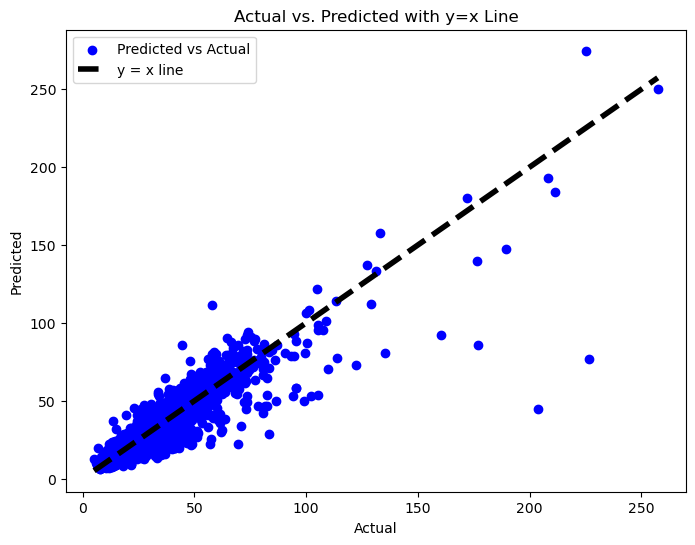

In [106]:
# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_prediction, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='y = x line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted with y=x Line')
plt.legend()
plt.show()

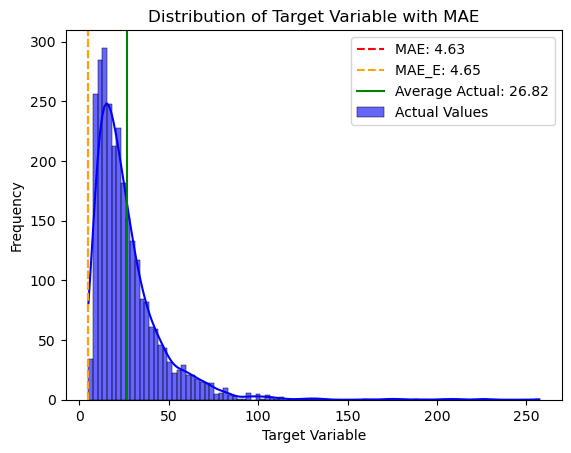

In [108]:
avg = y_test.mean()
sns.histplot(y_test, kde=True, label='Actual Values', color='blue', alpha=0.6)
plt.axvline(x=final_mae, color='red', linestyle='--', label=f'MAE: {final_mae:.2f}')
plt.axvline(x=final_mae_E, color='orange', linestyle='--', label=f'MAE_E: {final_mae_E:.2f}')
plt.axvline(x=avg, color='green', linestyle='-', label=f'Average Actual: {avg:.2f}')

plt.title('Distribution of Target Variable with MAE')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [109]:
Q1 = np.percentile(y_test, 25)
Q3 = np.percentile(y_test, 75)
IQR = Q3 - Q1

mae_percent = final_mae / IQR * 100
print(f"MAE% {mae_percent:.2f}%")

MAE% 25.09%


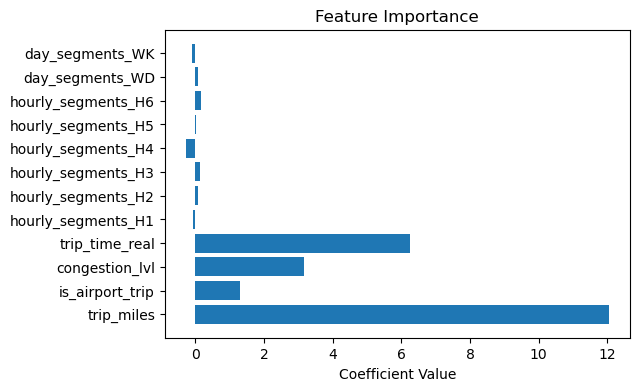

In [114]:
features = X_test_scaled.drop(columns=['enc_day_x_time', 'enc_PUxDOL']).columns.tolist()
coefficients = final_model.coef_


# Plotting feature importance
plt.figure(figsize=(6, 4))
plt.barh(range(len(features)), coefficients, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


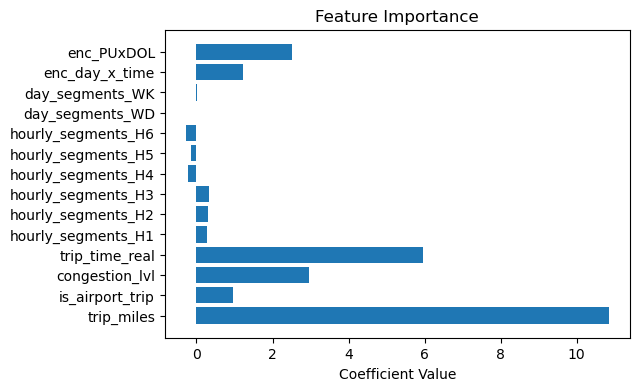

In [112]:
features = X_train.columns.tolist()
coefficients = final_model_E.coef_


# Plotting feature importance
plt.figure(figsize=(6, 4))
plt.barh(range(len(features)), coefficients, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()
